In [2]:
import networkx as nx
from pymongo import MongoClient

# Connect to DB
db = MongoClient("mongodb://mongo:27017").erica

# Load nodes and edges
nodes = list(db.entity_nodes.find({}))
edges = list(db.entity_edges.find({}))

print("Nodes loaded:", len(nodes))
print("Edges loaded:", len(edges))

# Build graph
G = nx.DiGraph()

for n in nodes:
    node_id = n["id"]
    node_type = n["type"]
    label = n.get("title") or n.get("description") or n.get("text") or ""

    G.add_node(node_id,
               type=node_type,
               label=label)

for e in edges:
    G.add_edge(e["source"], e["target"], type=e["type"])

print("Graph built!")
print("Graph nodes:", G.number_of_nodes())
print("Graph edges:", G.number_of_edges())

ModuleNotFoundError: No module named 'networkx'

In [3]:
# Fix empty labels
for n in G.nodes():
    if not G.nodes[n]["label"]:
        G.nodes[n]["label"] = f"{G.nodes[n]['type']}"

# Assign colors
color_map = {
    "concept": "#4E79A7",
    "resource": "#F28E2B",
    "example": "#E15759",
}

node_colors = [color_map[G.nodes[n]["type"]] for n in G.nodes()]

NameError: name 'G' is not defined

In [4]:
G = nx.DiGraph()

missing_type = 0
missing_label = 0

for node in nodes:
    node_id = node.get("id")

    if not node_id:
        continue

    node_type = node.get("type")
    node_label = node.get("title") or node.get("text")

    if node_type is None:
        missing_type += 1
        continue  # skip nodes with no type

    if node_label is None:
        missing_label += 1
        node_label = ""  # fallback

    G.add_node(
        node_id,
        type=node_type,
        label=node_label
    )

# Add edges (keep only if both endpoints exist)
for edge in edges:
    s, t = edge["source"], edge["target"]
    if s in G.nodes and t in G.nodes:
        G.add_edge(s, t, type=edge["type"])

print("Graph built!")
print("Total nodes with type:", G.number_of_nodes())
print("Missing type nodes skipped:", missing_type)
print("Missing label nodes:", missing_label)
print("Edges:", G.number_of_edges())

NameError: name 'nx' is not defined

In [5]:
concept_nodes = [
    n for n, data in G.nodes(data=True)
    if data.get("type") == "concept"
]

print("Concept nodes kept:", len(concept_nodes))

H = G.subgraph(concept_nodes).copy()

print("Subgraph nodes:", H.number_of_nodes())
print("Subgraph edges:", H.number_of_edges())

NameError: name 'G' is not defined

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize=(16, 10))

# Compute "depth" (layer number) based on number of prerequisites
layer = {}
for n in H.nodes:
    layer[n] = len(list(H.predecessors(n)))

# Convert layers into y-levels: deeper concepts → lower on page
pos = {}
for n in H.nodes:
    pos[n] = (layer[n], -layer[n] * 0.5)  # x = layer, y = negative layer to spread vertically

# Draw graph
nx.draw(
    H, pos,
    with_labels=True,
    node_size=1800,
    node_color="#4d8cf5",
    font_size=9,
    font_color="white",
    arrows=True,
    arrowstyle="-|>",
    arrowsize=12
)

plt.title("Knowledge Graph – Concepts Only (Layered DAG Layout)")
plt.show()


ModuleNotFoundError: No module named 'matplotlib'

In [7]:
bad_edges = []
for e in edges:
    if e["source"] not in G.nodes or e["target"] not in G.nodes:
        bad_edges.append(e)

len(bad_edges), bad_edges[:10]


NameError: name 'edges' is not defined

In [8]:
correct_id = "a10572fb-31fc-43ca-b57e-711737a517ab"

fixed_edges = []

for e in edges:
    src = e["source"]
    tgt = e["target"]

    # Fix the incorrect target
    if tgt == "near-transfer checks":
        tgt = correct_id

    # Skip edges referencing non-existent nodes
    if src not in G.nodes or tgt not in G.nodes:
        continue

    fixed_edges.append({"type": e["type"], "source": src, "target": tgt})

print("Original edges:", len(edges))
print("Fixed edges:", len(fixed_edges))


NameError: name 'edges' is not defined

In [9]:
G2 = nx.DiGraph()

# Copy all nodes
for n, d in G.nodes(data=True):
    G2.add_node(n, **d)

# Add corrected edges
for e in fixed_edges:
    G2.add_edge(e["source"], e["target"], type=e["type"])

print("Graph G2 ready with:", len(G2.nodes), "nodes and", len(G2.edges), "edges")

NameError: name 'nx' is not defined

In [10]:
concept_edges = [
    e for e in fixed_edges
    if G2.nodes[e["source"]].get("type") == "concept"
    and G2.nodes[e["target"]].get("type") == "concept"
]

print("Concept-concept edges:", len(concept_edges))
concept_edges

Concept-concept edges: 0


[]

In [11]:
from pymongo import MongoClient
import networkx as nx
import matplotlib.pyplot as plt

db = MongoClient("mongodb://localhost:27017").erica
nodes = list(db.entity_nodes.find({}))
edges = list(db.entity_edges.find({}))

print("Nodes:", len(nodes))
print("Edges:", len(edges))

ModuleNotFoundError: No module named 'pymongo'

In [12]:
G = nx.DiGraph()

for n in nodes:
    nid = n["id"]
    label = n.get("title") or n.get("text") or "UNKNOWN"
    G.add_node(nid, type=n["type"], label=label)

print("Nodes loaded:", len(G.nodes))


NameError: name 'nx' is not defined

In [13]:
# Correcting the wrong target
correct_concept_id = "a10572fb-31fc-43ca-b57e-711737a517ab"

fixed_edges = []

for e in edges:
    src = e["source"]
    tgt = e["target"]

    # Fix the broken edge
    if tgt == "near-transfer checks":
        tgt = correct_concept_id

    # Remove self-loop
    if src == tgt:
        print("Removed self-loop:", src)
        continue

    # Skip if node does not exist
    if src not in G.nodes or tgt not in G.nodes:
        print("Skipping bad edge:", e)
        continue

    fixed_edges.append({"type": e["type"], "source": src, "target": tgt})

print("Original edges:", len(edges))
print("Fixed edges:", len(fixed_edges))


NameError: name 'edges' is not defined

In [14]:
G2 = nx.DiGraph()

for n, d in G.nodes(data=True):
    G2.add_node(n, **d)

for e in fixed_edges:
    G2.add_edge(e["source"], e["target"], type=e["type"])

print("G2 nodes:", len(G2.nodes))
print("G2 edges:", len(G2.edges))

NameError: name 'nx' is not defined

In [15]:
concept_nodes = [n for n, data in G2.nodes(data=True) if data["type"] == "concept"]

concept_edges = [
    e for e in fixed_edges
    if G2.nodes[e["source"]]["type"] == "concept"
    and G2.nodes[e["target"]]["type"] == "concept"
]

print("Concept nodes:", len(concept_nodes))
print("Concept-concept edges:", len(concept_edges))
concept_edges


NameError: name 'G2' is not defined

In [16]:
H = G2.subgraph(concept_nodes).copy()

print("Subgraph nodes:", len(H.nodes))
print("Subgraph edges:", len(H.edges))


NameError: name 'G2' is not defined

In [17]:
plt.figure(figsize=(14, 14))
pos = nx.circular_layout(H)

nx.draw_networkx(
    H,
    pos,
    labels={n: H.nodes[n]["label"] for n in H.nodes},
    node_size=1500,
    node_color="#4E79A7",
    font_size=9,
    font_color="white",
    arrows=True,
    arrowstyle="-|>",
    arrowsize=15,
)

plt.title("Knowledge Graph – Concepts Only (Circular Layout)", fontsize=16)
plt.axis("off")
plt.show()


NameError: name 'plt' is not defined

In [ ]:
from networkx.drawing.nx_agraph import graphviz_layout

plt.figure(figsize=(18, 16))
pos = graphviz_layout(H, prog="dot")

nx.draw(
    H,
    pos,
    labels={n: H.nodes[n]["label"] for n in H.nodes},
    with_labels=True,
    node_size=1500,
    node_color="#59A14F",
    font_size=9,
    font_color="white",
    arrows=True,
)

plt.title("Knowledge Graph – Concepts Only (DAG Layout)", fontsize=18)
plt.axis("off")
plt.show()


ImportError: requires pygraphviz http://pygraphviz.github.io/

<Figure size 1800x1600 with 0 Axes>

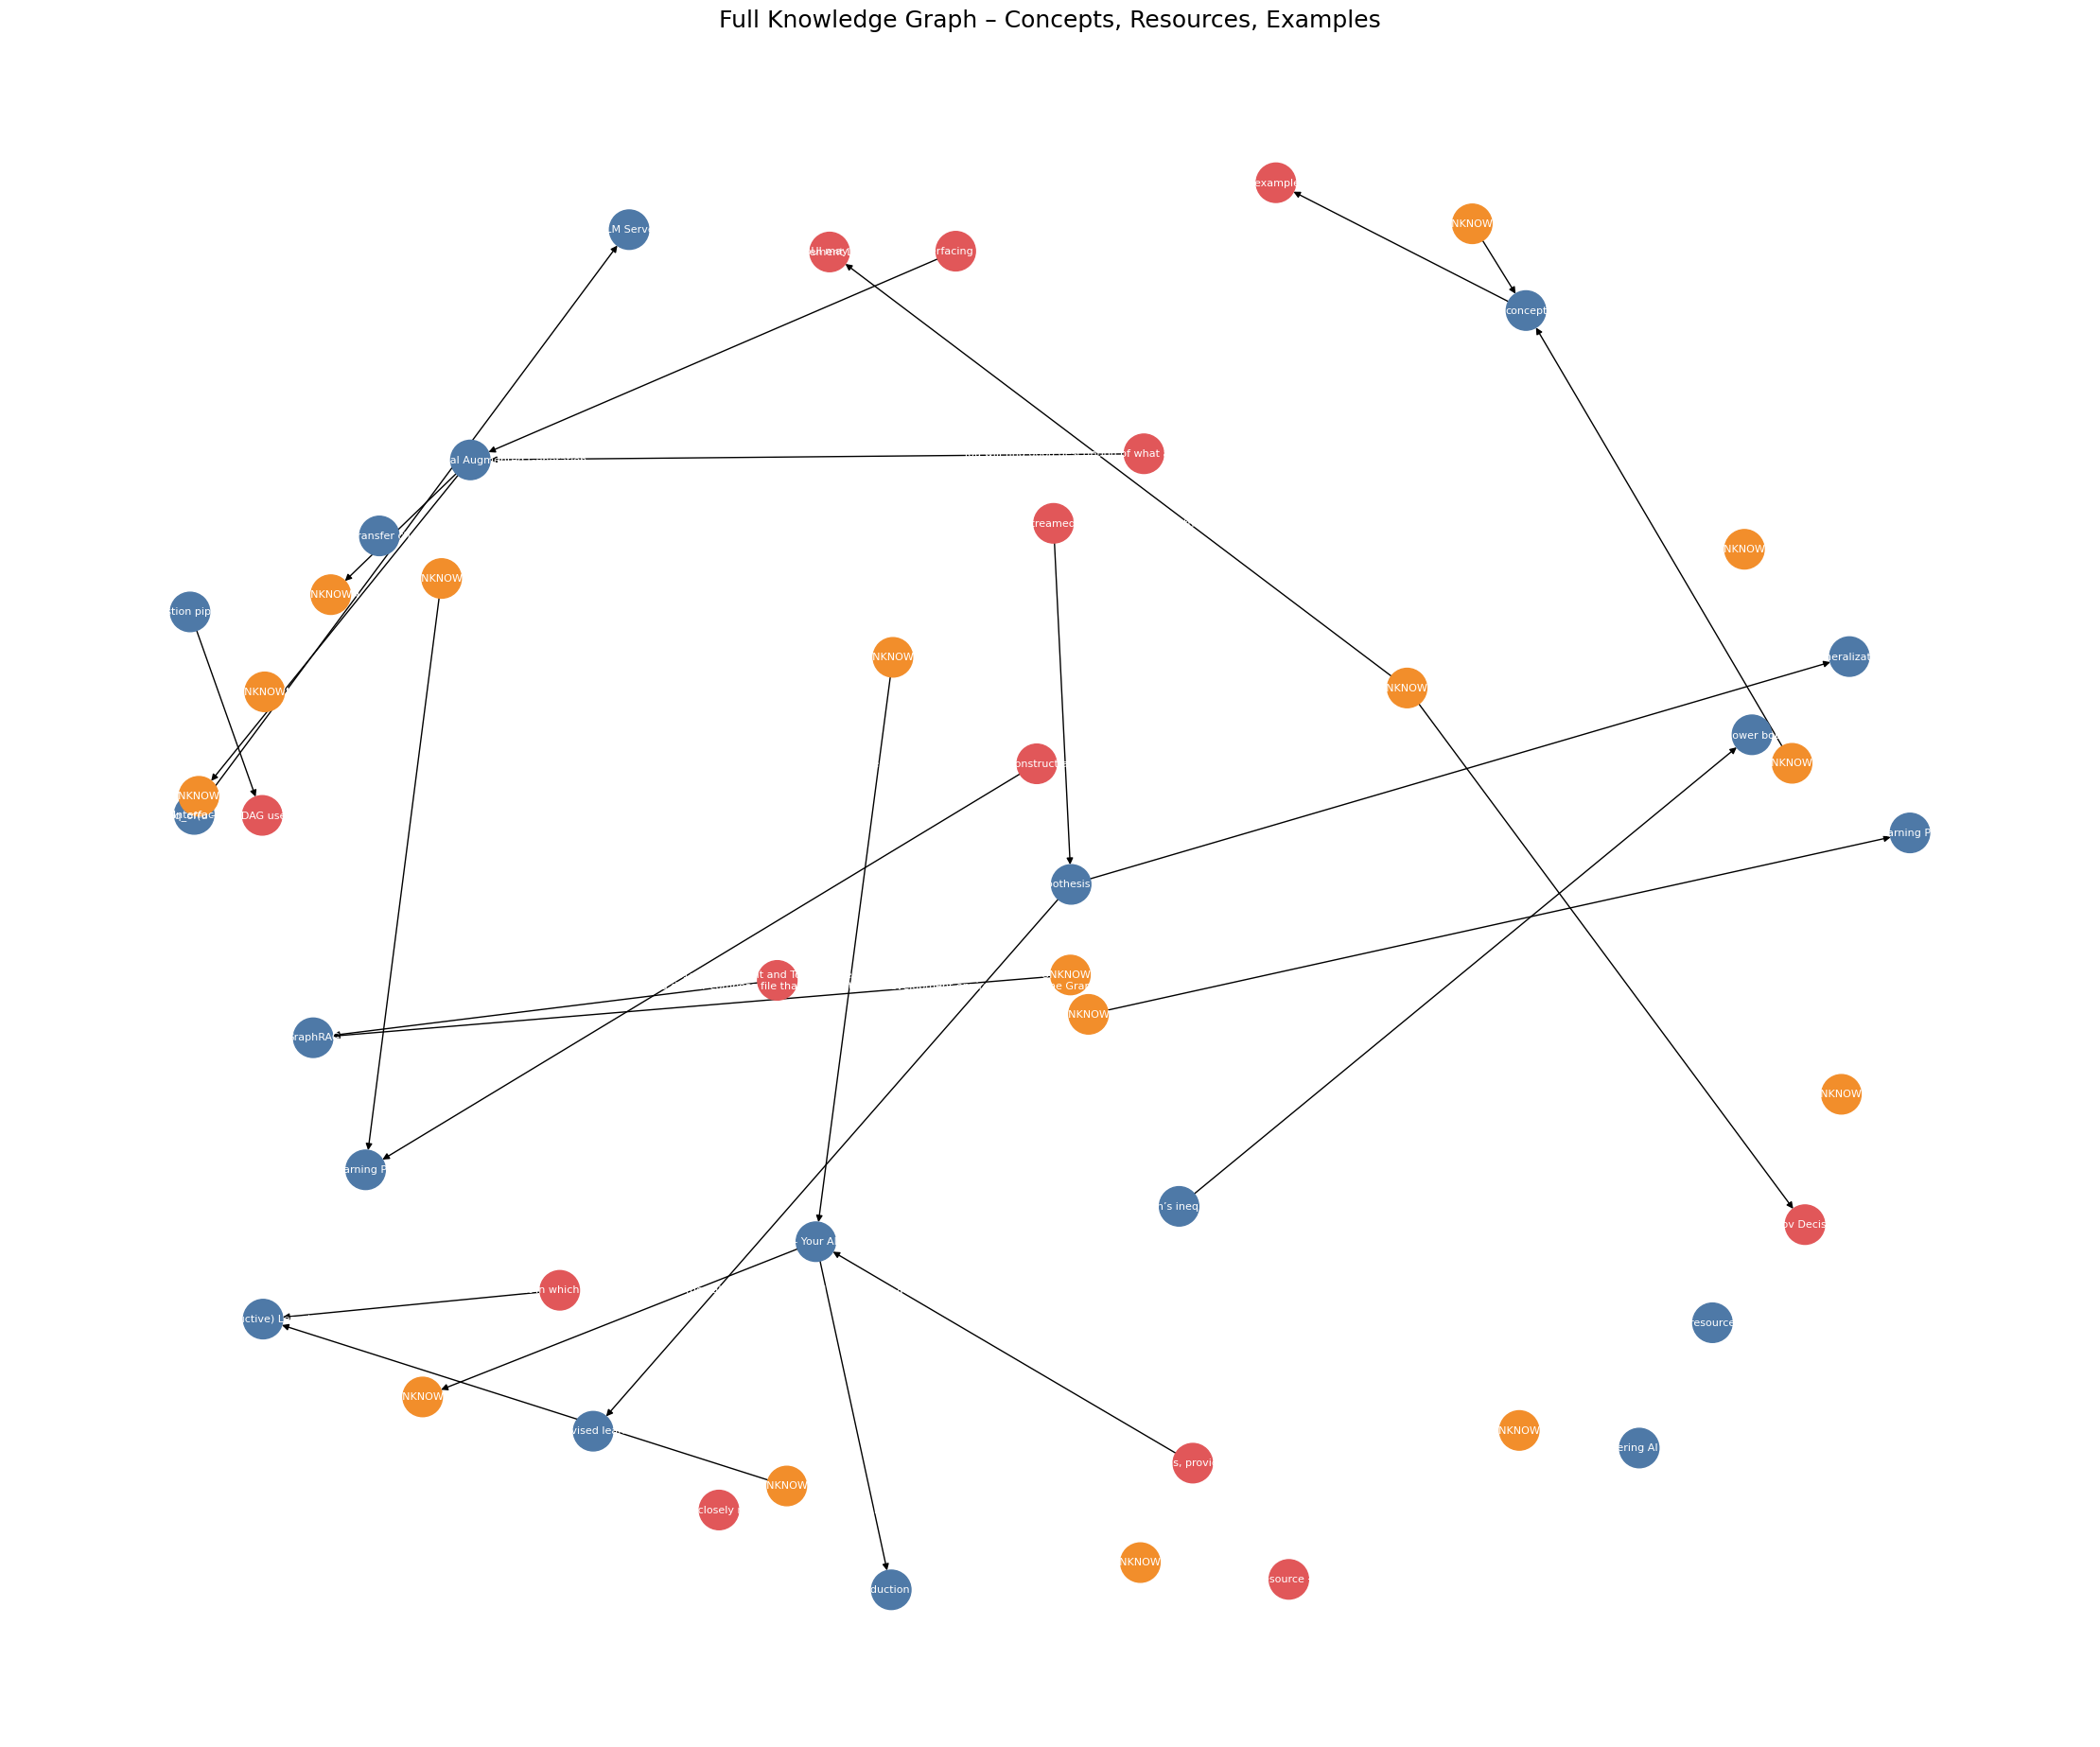

In [ ]:
color_map = {
    "concept": "#4E79A7",
    "resource": "#F28E2B",
    "example": "#E15759",
}

plt.figure(figsize=(22, 18))
pos = nx.spring_layout(G2, k=0.7, iterations=50)

nx.draw(
    G2,
    pos,
    labels={n: G2.nodes[n]["label"] for n in G2.nodes},
    node_color=[color_map[G2.nodes[n]["type"]] for n in G2.nodes],
    node_size=900,
    font_size=8,
    font_color="white",
    arrows=True,
)

plt.title("Full Knowledge Graph – Concepts, Resources, Examples", fontsize=18)
plt.axis("off")
plt.show()


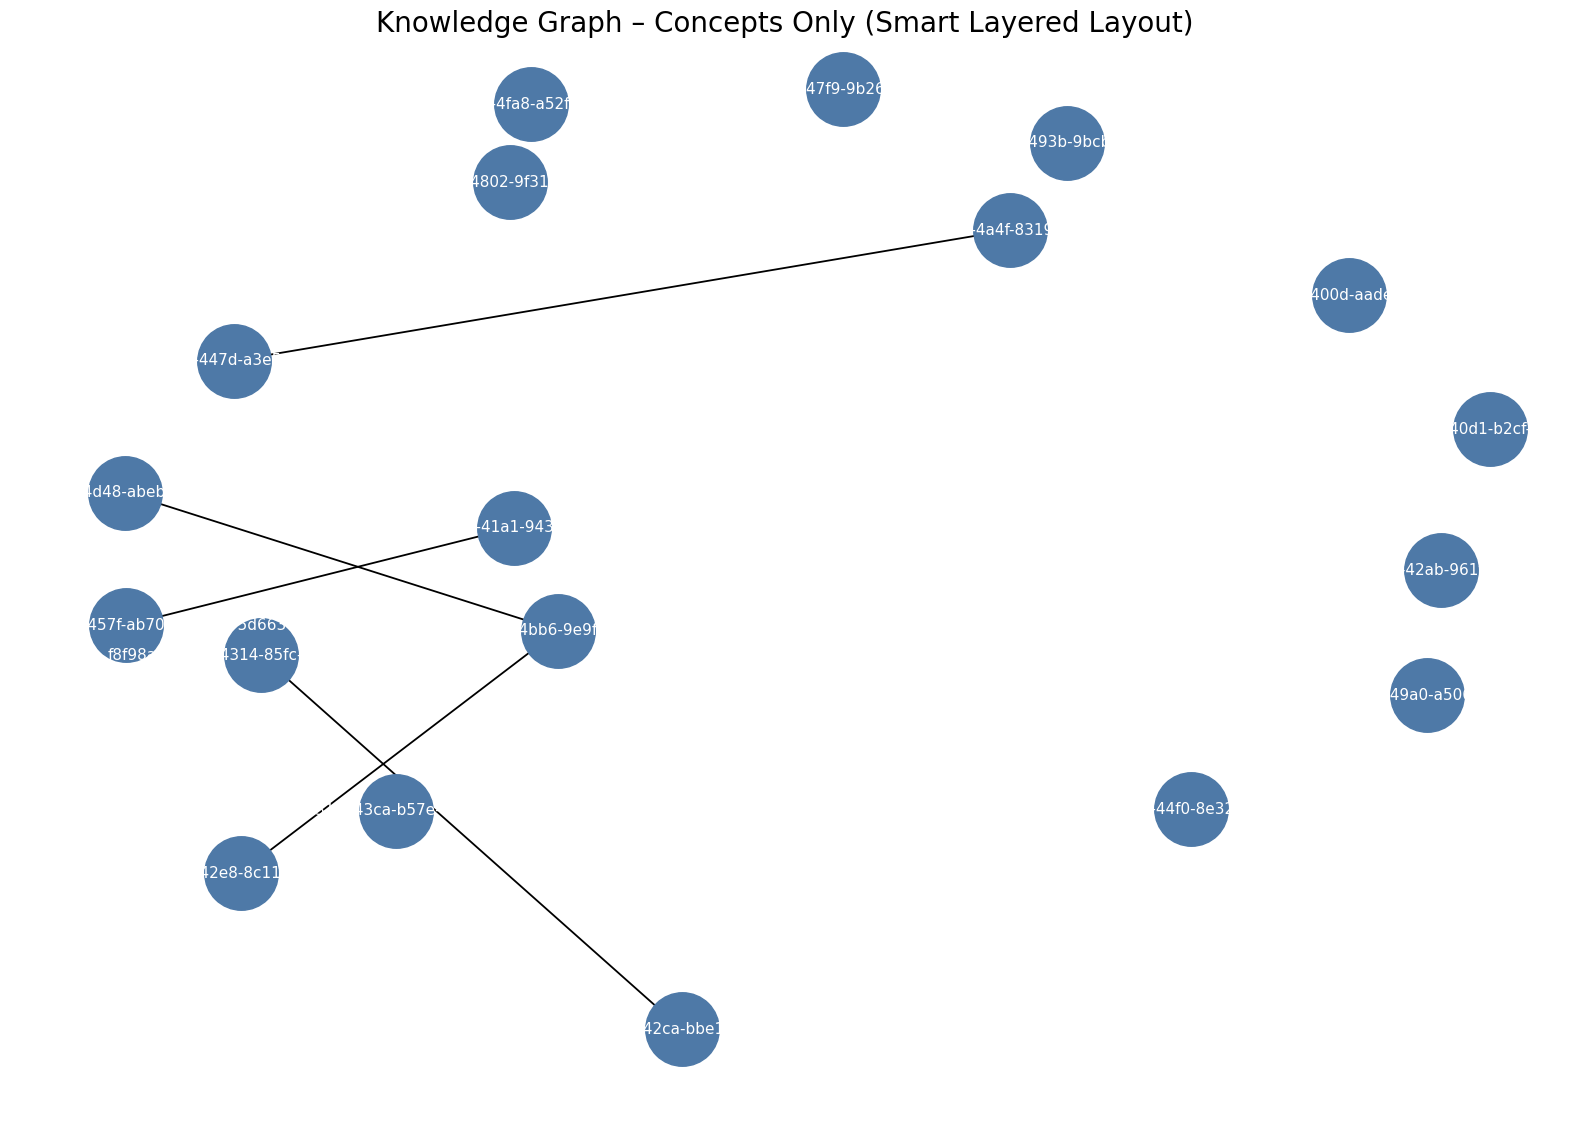

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def smart_layout(H):
    # Start with force layout
    pos = nx.spring_layout(H, k=1.1, seed=42)

    # Now adjust Y positions by number of prerequisites (layering)
    indeg = {n: H.in_degree(n) for n in H.nodes()}
    for n, (x, y) in pos.items():
        pos[n] = np.array([x, y - indeg[n] * 0.4])  # push dependent concepts downward

    return pos

plt.figure(figsize=(20, 14))

pos = smart_layout(H)

nx.draw_networkx_nodes(H, pos, node_size=2800, node_color="#4E79A7")
nx.draw_networkx_labels(H, pos, font_size=11, font_color="white")

nx.draw_networkx_edges(
    H,
    pos,
    arrows=True,
    arrowstyle="-|>",
    arrowsize=20,
    edge_color="black",
    width=1.3,
)

plt.title("Knowledge Graph – Concepts Only (Smart Layered Layout)", fontsize=20)
plt.axis("off")
plt.show()
